In [ ]:
import pandas as pd

# Load the CarSharing table from a CSV file
car_sharing_df = pd.read_csv('CarSharing.csv')

# Drop duplicate rows
car_sharing_df.drop_duplicates(inplace=True)

# Handle null values (example: fill with mean for numerical columns, mode for categorical columns)
for column in car_sharing_df.columns:
    if car_sharing_df[column].dtype == 'object':
        # Fill categorical columns with mode
        car_sharing_df[column].fillna(car_sharing_df[column].mode()[0], inplace=True)
    else:
        # Fill numerical columns with mean
        car_sharing_df[column].fillna(car_sharing_df[column].mean(), inplace=True)



In [ ]:
from scipy.stats import pearsonr, f_oneway, chi2_contingency

# List to store the results
results = []

# Iterate through each column except 'timestamp' and 'demand'
for column in car_sharing_df.columns:
    if column not in ['timestamp', 'demand']:
        if car_sharing_df[column].dtype in ['float64', 'int64']:
            # Numerical column: use Pearson correlation
            corr, p_value = pearsonr(car_sharing_df[column], car_sharing_df['demand'])
            results.append((column, 'Pearson correlation', corr, p_value))
        else:
            # Categorical column: use ANOVA
            groups = [car_sharing_df[car_sharing_df[column] == category]['demand'] for category in car_sharing_df[column].unique()]
            f_stat, p_value = f_oneway(*groups)
            results.append((column, 'ANOVA', f_stat, p_value))

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['Column', 'Test', 'Statistic', 'P-Value'])
print(results_df)

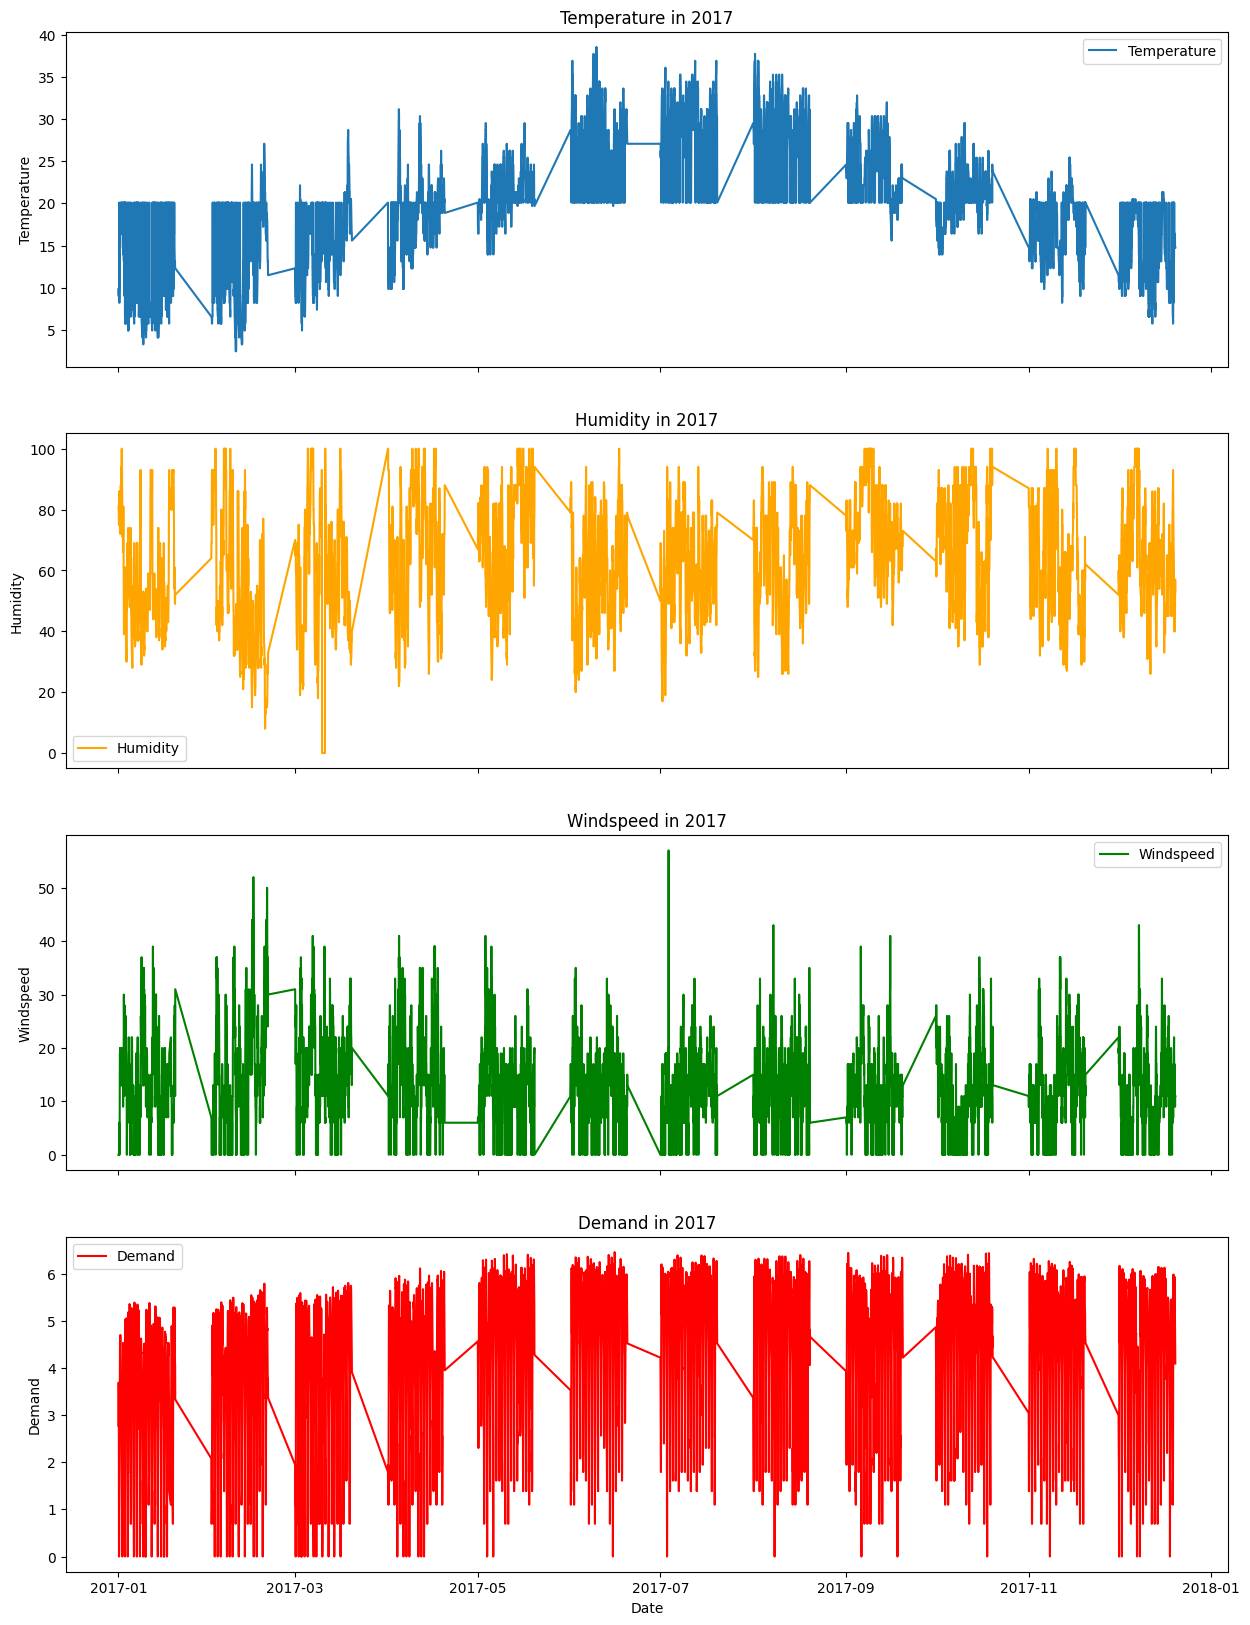

In [50]:
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime format
car_sharing_df['timestamp'] = pd.to_datetime(car_sharing_df['timestamp'])

# Filter data for the year 2017
data_2017 = car_sharing_df[car_sharing_df['timestamp'].dt.year == 2017]

# Set the 'timestamp' column as the index
data_2017.set_index('timestamp', inplace=True)

# Plot the data
fig, axs = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Plot temperature
axs[0].plot(data_2017.index, data_2017['temp'], label='Temperature')
axs[0].set_ylabel('Temperature')
axs[0].set_title('Temperature in 2017')
axs[0].legend()

# Plot humidity
axs[1].plot(data_2017.index, data_2017['humidity'], label='Humidity', color='orange')
axs[1].set_ylabel('Humidity')
axs[1].set_title('Humidity in 2017')
axs[1].legend()

# Plot windspeed
axs[2].plot(data_2017.index, data_2017['windspeed'], label='Windspeed', color='green')
axs[2].set_ylabel('Windspeed')
axs[2].set_title('Windspeed in 2017')
axs[2].legend()

# Plot demand
axs[3].plot(data_2017.index, data_2017['demand'], label='Demand', color='red')
axs[3].set_ylabel('Demand')
axs[3].set_title('Demand in 2017')
axs[3].legend()

plt.xlabel('Date')
plt.show()

In [ ]:
%pip install statsmodels
%pip install scikit-learn

/var/folders/lx/lbm037f50yn_k64304hmc98r0000gn/T/ipykernel_15137/3716238813.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_data.fillna(method='ffill', inplace=True)


Mean Squared Error: 0.13961666700382824


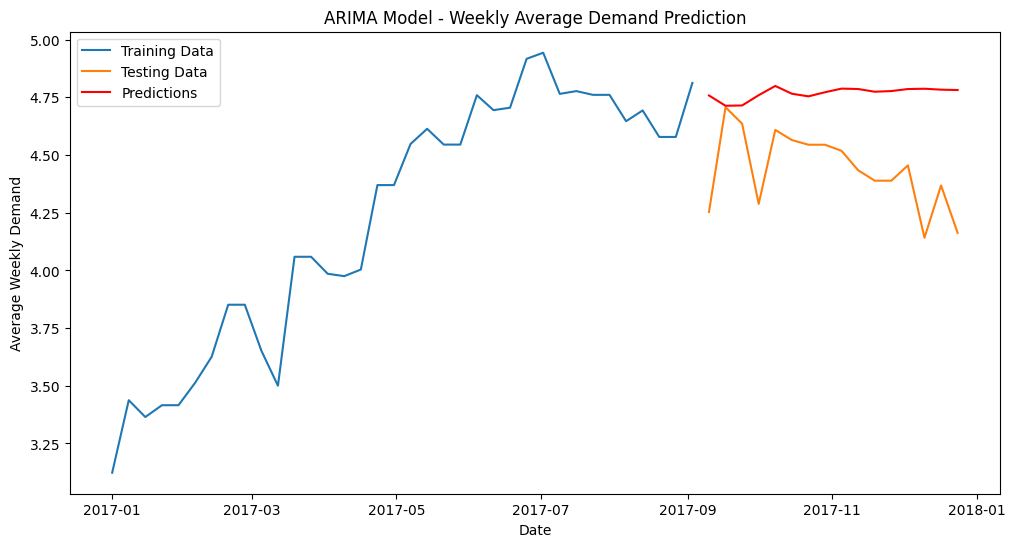

In [49]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Resample the data to weekly frequency and calculate the average demand
weekly_data = data_2017['demand'].resample('W').mean()

# Fill NaN values using forward fill method
weekly_data.fillna(method='ffill', inplace=True)

# Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(weekly_data) * 0.7)
train, test = weekly_data[:train_size], weekly_data[train_size:]

# Fit an ARIMA model on the training set
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.forecast(steps=len(test))



# Evaluate the model's performance
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Average Weekly Demand')
plt.title('ARIMA Model - Weekly Average Demand Prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the features and target variable
X = car_sharing_df.drop(columns=['timestamp', 'demand'])
y = car_sharing_df['demand']

# Split the data into training and testing sets (70% training, 30% testing)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred)
print(f'Random Forest Mean Squared Error: {mse_rf:.4f}')

ValueError: could not convert string to float: 'spring'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

train_size = int(len(weekly_data) * 0.7)
train, test = weekly_data[:train_size], weekly_data[train_size:]

# Train the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)# Train the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate MSE and R2 score
mse_rf = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_rf)
r2 = rf_regressor.score(X_test, y_test)

# Get feature importance
feature_names = X_train.columns.tolist()
importances = rf_regressor.feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print(f'Random Forest Mean Squared Error: {mse_rf:.4f}')
print(f'Random Forest RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}\n')
print('Feature Importance:')
print(feature_importance)

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')


ValueError: could not convert string to float: 'spring'